In [1]:
import os

In [2]:
os.chdir("benchmark-on-So2SatLCZ42-dataset-a-simple-tour")

In [3]:
os.getcwd()

'/p/home/jusers/sajid1/jusuf/benchmark-on-So2SatLCZ42-dataset-a-simple-tour'

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import evaluation
from model import sen2LCZ_drop

/p/software/jusuf/stages/Devel-2019a/software/TensorFlow/1.13.1-GCCcore-8.3.0-GPU-Python-3.6.8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/p/software/jusuf/stages/Devel-2019a/software/TensorFlow/1.13.1-GCCcore-8.3.0-GPU-Python-3.6.8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/p/software/jusuf/stages/Devel-2019a/software/TensorFlow/1.13.1-GCCcore-8.3.0-GPU-Python-3.6.8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated;

In [5]:
file = "../PROJECT_training2005/dlr_challenge/data/validation.h5"

In [6]:
keyX = 'sen2'
keyY = 'label'

hf = h5py.File(file, 'r')
x_tra = np.array(hf[keyX])
y_tra = np.array(hf[keyY])
hf.close()

In [7]:
model = sen2LCZ_drop(depth=17, dropRate=0.2, fusion=1, training=True)

Instructions for updating:
Colocations handled automatically by placer.
with BN
0in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
1in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
2in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
(?, 32)
with BN
0in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
1in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
2in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(?, 64)
with BN
0in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
1in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
2in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
(?, 128)
with BN
0in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
1in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
2in3 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
with BN
(?, 128)


In [8]:
accs, ensemble_acc, p0, x, y, max_vars, mc_predictions = evaluation.evaluate(model)

(24119, 32, 32, 10) (24119, 17)
MC accuracy: 60.4%
MC-ensemble accuracy: 60.5%
(100, 17)
posterior mean: 8
true label: 8

class: 1; proba: 0.9%; var: 0.00% 
class: 2; proba: 0.8%; var: 0.00% 
class: 3; proba: 4.4%; var: 0.13% 
class: 4; proba: 0.1%; var: 0.00% 
class: 5; proba: 0.1%; var: 0.00% 
class: 6; proba: 0.0%; var: 0.00% 
class: 7; proba: 0.2%; var: 0.00% 
class: 8; proba: 75.6%; var: 3.17% 
class: 9; proba: 0.0%; var: 0.00% 
class: 10; proba: 16.9%; var: 3.12% 
class: 11; proba: 0.0%; var: 0.00% 
class: 12; proba: 0.0%; var: 0.00% 
class: 13; proba: 0.0%; var: 0.00% 
class: 14; proba: 0.0%; var: 0.00% 
class: 15; proba: 0.9%; var: 0.00% 
class: 16; proba: 0.1%; var: 0.00% 
class: 17; proba: 0.0%; var: 0.00% 


In [9]:
len(accs)

100

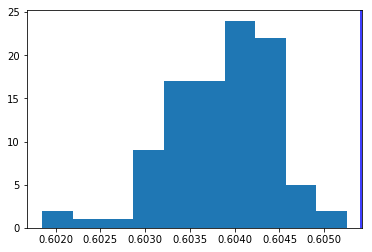

In [10]:
plt.hist(accs)
plt.axvline(x=ensemble_acc, color="b")

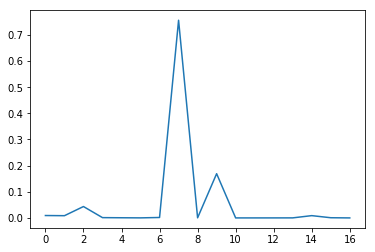

In [11]:
plt.plot(x, y)

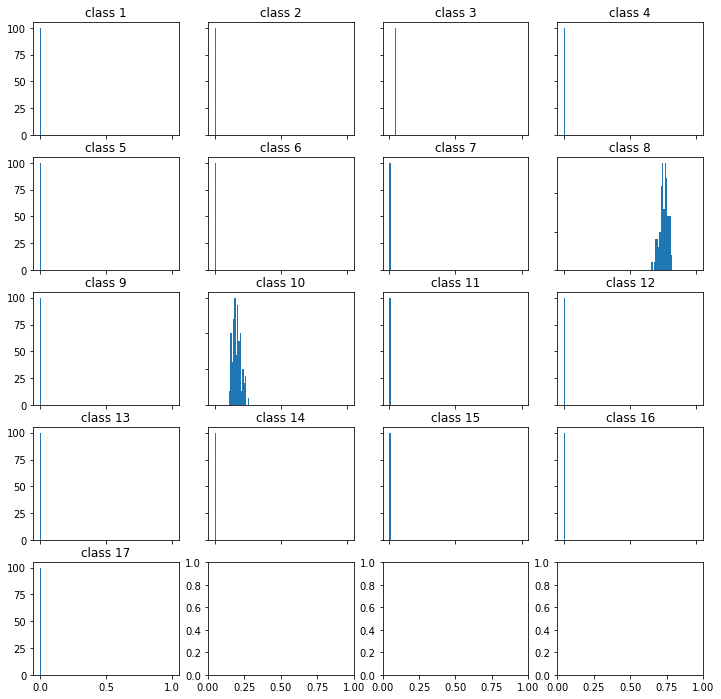

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(12,12))

for i, ax in enumerate(fig.get_axes()):
    if i < 17:
        ax.hist(p0[:,i], bins=100, range=(0,1));
        ax.set_title(f"class {i+1}")
        ax.label_outer()

In [13]:
top10 = (-np.array(max_vars)).argsort()[:10]

In [14]:
print(top10)

[55 89 70 36 68 16 27 99 22 15]


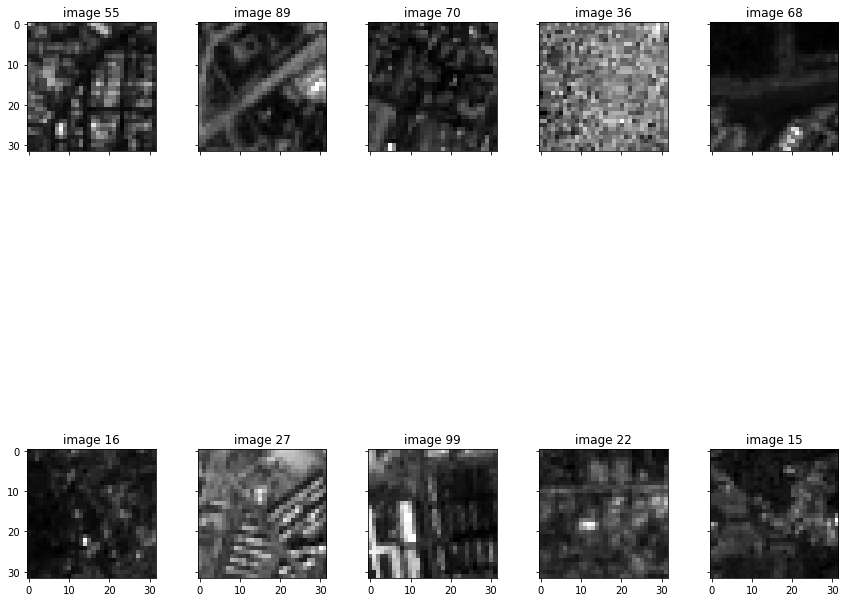

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(12,12))
fig.tight_layout() 

for i, ax in enumerate(fig.get_axes()):
    ax.imshow(x_tra[top10[i]][:,:,0], cmap='gray')
    ax.set_title(f"image {top10[i]}")
    ax.label_outer()